In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions import *

In [2]:
def MSE(est, tru):
    return np.mean(np.linalg.norm(est-tru,axis=1)**2)

## Part One
#### Approximating the linear vector field

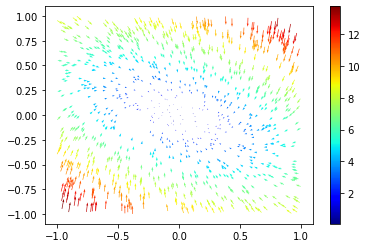

In [3]:
x0 = np.loadtxt('data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('data/linear_vectorfield_data_x1.txt')
dt = 0.01
v = (x1 - x0)/dt
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], np.linalg.norm(v,axis=1),cmap='jet')
plt.colorbar()

#### Approximating the matrix $A \in \mathbb{R}^{2x2}$

In [4]:
A_1 = np.matmul((x0.T),x0);
A_2 = np.linalg.inv(A_1)
A_3 = np.matmul(A_2,x0.T)
A_T = np.matmul(A_3,v)
A = A_T.T

print(A)

[[-4.9355245   2.31911527]
 [-4.63823204 -9.5737573 ]]


## Part Two
#### Estimating value of $x_1^{(k)}$ by solving $\dot{x} =\hat{A}x $

In [5]:
x = x0
T_end = 0.1
t = 0
while t < T_end:
    x += x@A*dt
    t += dt
x1hat = x
MSE(x1hat, x1)

0.21356373988316169

## Part Three
#### Solving equation with initial point as (10,10)

In [20]:
x = np.array([10, 10])
T_end = 100
t = 0
#x_list = np.empty
x_list = [np.array([10,10])]
x_dot_list = [0]
while t < T_end:
    x_dot = x@A
    print(type(x))
    x += x_dot*dt
    t += dt
    x_list.append(x)
    x_dot_list.append(x_dot)
print(x_list)

<class 'numpy.ndarray'>


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [7]:
#Plotting the trajectory

Text(0.5, 1.0, '$x_0 = (10,10)$; $\\dot{x} =\\hat{A}x $')

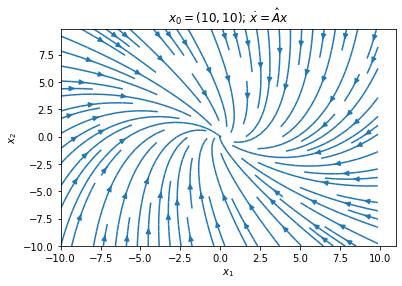

In [9]:
# Plotting the Phase portrait
xmin=-10.
xmax=10.
ymin=-10.
ymax=10.
X, Y = np.meshgrid(np.arange(xmin,xmax, 0.1), np.arange(ymin,ymax,0.1))
XY = np.array([X.flatten(), Y.flatten()])
AXY = np.matmul(A, XY)
U = AXY[0].reshape(X.shape)
V = AXY[1].reshape(Y.shape)
plt.figure()
plt.streamplot(X, Y, U, V)
plt.plot(x_list[0],x_list[1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'$x_0 = (10,10)$; $\dot{x} =\hat{A}x $')